# 사다리
- https://www.acmicpc.net/problem/2022

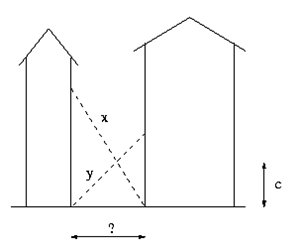

실수: 소수점 6번째자리부터 3,000,000,000까지

**Solution**
- 1. 피타고라스 정리를 통해 h로 가정
- 2. h를 이진탐색으로 구함

In [15]:
import math

x, y, c = map(float, input().split())

# x와 y는 각각의 삼각형에서 가장 긴 변의 길이임으로 right은 x와 y 둘 중 더 작은 값보다 클 수 없음
left, right = 0, min(x, y)
# 절대/상대 오차는 10-3까지 허용
while left+0.001 <= right:
    w = (left+right) / 2 # mid
    h1 = math.sqrt(x*x-w*w)
    h2 = math.sqrt(y*y-w*w)
    h = (h1*h2) / (h1+h2)
    # 밑변(w)에 따라 높이가 달라짐
    if h > c: # 높이가 답(c)보다 크다면 밑변(w)를 더 길게 만들어야됨
        left = w
    else: # 높이가 답(c)보다 작거나 같으면 밑변(w)를 더 짧게 만들어야됨
        right = w
        
print(round(w,3))

12.619429 8.163332 3
7.0


# 휴게소 세우기
- https://www.acmicpc.net/problem/1477

휴게소를 M개 더 지어서 휴게소가 없는 구간의 길이의 최댓값을 최소로 하려고 한다.
- 0 ≤ N ≤ 50
- 1 ≤ M ≤ 100
- 100 ≤ L ≤ 1,000
- 1 ≤ 휴게소의 위치 ≤ L-1
- N+M < L
- 모든 휴게소의 위치는 중복되지 않음
- 입력으로 주어지는 모든 수는 정수

**Solution**
1. 휴게소가 없는 구간의 길이의 최댓값의 최소값을 mid로 가정
2. 휴게소 사이의 거리를 기준으로 휴게소 설치 개수를 이분탐색

In [5]:
import sys
input = sys.stdin.readline

# 현재 휴게소의 개수 N, 더 지으려고 하는 휴게소의 개수 M, 고속도로의 길이 L
n, m, l = map(int,input().split())
# 휴게소의 위치
stop = list(map(int,input().split()))
stop.append(l)
stop.sort()

# 최솟값은 1, 최댓값은 고속도로의 끝에 지을 수 없기 때문에 끝-1
start, end = 1, l-1

ans = 0
while start <= end:
    mid = (start + end) // 2
    now = 0 # 현재 위치
    cnt = 0 # 설치한 휴게소의 개수
    for position in stop:
        diff = position - now
        now = position
        if diff > mid:
            cnt += (diff-1) // mid 
    if cnt > m:
        start = mid+1
    else:
        ans = mid
        end = mid -1  
print(ans)

3 1 1000
200 701 800
251


# 세부
- https://www.acmicpc.net/problem/13905

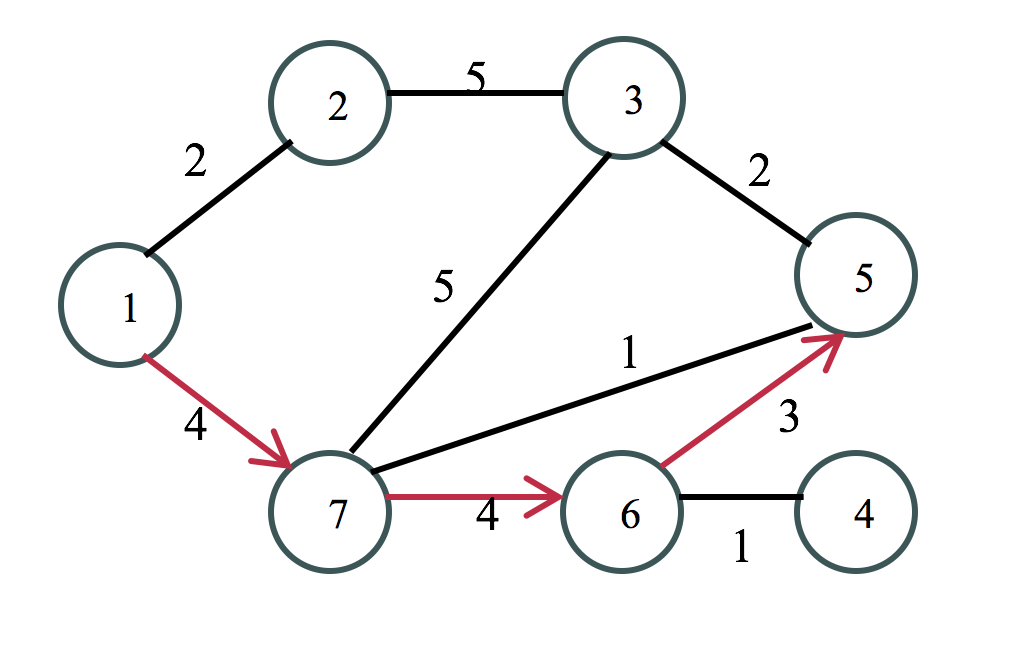

**Solution**
- BFS + 이진탐색

In [41]:
from collections import deque
# 집, 다리의 수
n, m = map(int, input().split())
# 출발위치, 혜빈이 위치
s, e = map(int, input().split())

bridges = []
for _ in range(m):
    bridges.append(list(map(int, input().split())))
    
graph = [[] for _ in range(n+1)]
for h1, h2, cost in bridges:
    graph[h1].append([h2, cost])
    graph[h2].append([h1, cost])
    
def bfs(min_weight, graph):
    q = deque()
    visited = [False] * (n+1)
    visited[s] = 1
    q.append(s)
    
    while q:
        now = q.popleft()
        if now == e:
            return True
        for there, cost in graph[now]:
            if min_weight <= cost and not visited[there]:
                visited[there] = 1
                q.append(there)
                
    return False

answer = 0
left, right = 1, 1000000

while left <= right:
    mid = (left+right) // 2
    is_possible = bfs(mid, graph)
    
    if is_possible:
        answer = mid
        left = mid + 1
    else:
        rigth = mid - 1
        
print(answer)

7 9
1 5
1 2 2
1 7 4
2 3 5
3 7 5
4 6 1
6 7 4
5 6 3
5 7 1
3 5 2
3
